In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob 
import matplotlib.pyplot as plt

sns.set_context("talk")
data_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/"


# load families summary
summary_homfam_exthomfam = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_exthomfam.csv")
summary_homfam = summary_homfam_exthomfam[summary_homfam_exthomfam.dataset == "homfam"]
families = summary_homfam.drop(["subset", "file", "min_length", "max_length", "perc_ref_total", "dataset"], axis = 1)

evaluation_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/"
sims = os.path.join(evaluation_dir,"homfam/evaluation/sim/*FAMSA.MBED.sim")
sim_df = pd.DataFrame()
for file in list(glob.glob(sims)):
    full_name = file.split(sep = "/")[-1].replace(".sim", "")
    file_opened = open(file, "r")
    tot_line = [line.split() for line in file_opened if line.startswith('TOT')]
    entry = pd.DataFrame({'name': [full_name],"sim_tot": tot_line[0][3]})
    sim_df =  pd.concat([sim_df, entry], ignore_index = True)

    
sim_df["family"] = sim_df.name.str.split(".", expand = True)[0]
sim_df["family"] = sim_df.family.str.replace("-ref", "")
sim_df = sim_df.rename(columns = {"sim_tot": "sim"})
families = pd.merge(families,sim_df)
families = families.drop(["name"], axis = 1)
families["sim"] = families.sim.astype(float)
# Import custom functions
from utils_benchmark import * 
#test()

# 1. PREP SCORES
def get_scores(score_files): 
    def parse_score(score_file): 
        return(pd.read_csv(score_file,sep = ";", header = None).drop(4, axis = 1))

    scores = pd.concat(list(map(parse_score, score_files)))
    scores = scores.iloc[:,0:4]
    scores.columns = ['name', 'sp', 'tc', 'column']
    #scores.name = scores.name.str.split(".", expand = True)[:-1]
    #scores[["family", "method", "bucket_size", "align_method", "tree_method"]] = scores.name.str.split(".", expand = True)
    #scores = scores.drop("method", axis = 1)
    return(scores)

In [2]:
score_files_sequence = glob.glob(os.path.join(data_dir, "evaluation/score/*progressive.FAMSA.MBED*"))
score_files_dynamic = glob.glob(os.path.join(data_dir, "evaluation/score/*dynamic.*100000000*.MBED*"))
score_files_regressive = glob.glob(os.path.join(data_dir, "evaluation/score/*regressive.*FAMSA*.MBED*"))

In [3]:
score_files_regressive = glob.glob(os.path.join(data_dir, "evaluation/score/*regressive.*.MBED*"))
score_files_regressive

['/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/hip.fs_regressive.1000.fsproba.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/tim.regressive.50.FAMSA.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/hla.regressive.50.FAMSA.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/hip.3d_regressive.100.3dcoffee.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/hr.regressive.50.FAMSA.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/hormone_rec.regressive.50.FAMSA.MBED.scores',
 '/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/evaluation/score/ghf11.regressive.50.FAMSA.MBED

In [4]:
scores_sequence = get_scores(score_files_sequence)
scores_sequence[["family", "method", "align_method", "tree_method"]] = scores_sequence.name.str.split(".", expand = True)
scores_sequence = scores_sequence.merge(families, on = "family")

scores_dynamic = get_scores(score_files_dynamic)
scores_dynamic[["family", "method", "bucket_size", "dynamicX_label","dynamicX_val","master_msa", "slave_msa", "tree_method"]] = scores_dynamic.name.str.split(".", expand = True)
scores_dynamic = scores_dynamic.merge(families, on = "family")


In [5]:
scores_reg = get_scores(score_files_regressive)
scores_reg[["family", "method", "bucket_size", "align_method", "tree_method"]] = scores_reg.name.str.split(".", expand = True)
scores_reg = scores_reg.merge(families, on = "family")

In [6]:
df = pd.merge(scores_sequence,scores_dynamic, on= "family", suffixes = ("_sequence", "_dynamic"))

In [11]:
scores_dynamic

,name,sp,tc,column,family,method,bucket_size,dynamicX_label,dynamicX_val,master_msa,slave_msa,tree_method,n_sequences,mean_length,size_group,sim
0,asp.dynamic.50.dynamicX.100000000.tcoffee_msa....,69.1,38.0,39.9,asp,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,3262,284.141631,small,37.41
1,ghf10.dynamic.50.dynamicX.100000000.famsa_msa....,82.5,67.5,72.0,ghf10,dynamic,50,dynamicX,100000000,famsa_msa,famsa_msa,MBED,1502,220.340213,small,42.85
2,ghf10.dynamic.50.dynamicX.100000000.tcoffee_ms...,84.3,70.6,75.0,ghf10,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,1502,220.340213,small,42.85
3,tgfb.dynamic.50.dynamicX.100000000.tcoffee_msa...,88.7,53.0,61.5,tgfb,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,1606,95.464508,small,43.12
4,serpin.dynamic.50.dynamicX.100000000.tcoffee_m...,94.4,79.9,86.6,serpin,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,3144,291.461832,small,33.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,lyase_1.dynamic.50.dynamicX.100000000.tcoffee_...,85.0,70.6,74.1,lyase_1,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,7632,295.081761,medium,32.26
92,hla.dynamic.50.dynamicX.100000000.tcoffee_msa....,96.3,93.3,93.3,hla,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,13465,153.147642,large,76.46
93,hr.dynamic.50.dynamicX.100000000.tcoffee_msa.f...,97.9,91.1,96.7,hr,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,3707,65.151335,small,53.31
94,HLH.dynamic.50.dynamicX.100000000.tcoffee_msa....,77.4,51.2,69.5,HLH,dynamic,50,dynamicX,100000000,tcoffee_msa,famsa_msa,MBED,6781,53.545347,medium,27.98


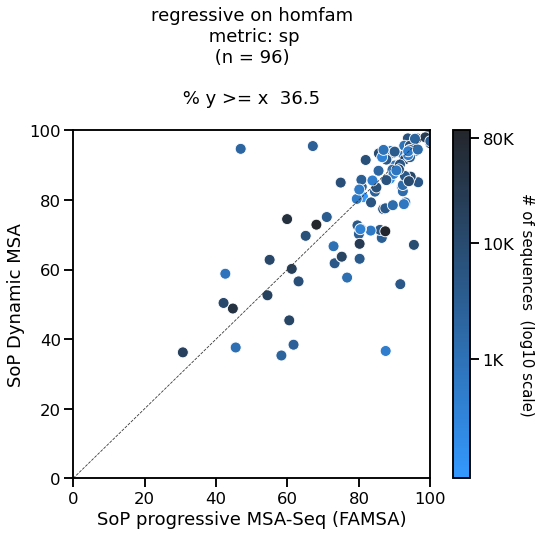

In [12]:
plot_scatter_perc(scores_sequence,scores_dynamic,'SoP progressive MSA-Seq (FAMSA)', 'SoP Dynamic MSA', metric = "sp")

In [ ]:
plot_scatter_perc(scores_sequence,scores_reg,'SoP progressive MSA-Seq (FAMSA)', 'SoP Reg FAMSA', metric = "sp")

In [116]:
score_compact_file = glob.glob(os.path.join(data_dir, "evaluation/score/*regressive_comp_analysis*100.comp*"))
score_compact = get_scores(score_compact_file)
score_compact[["family", "method", "bucket_size", "align_method", "tree_method"]] = score_compact.name.str.split(".", expand = True)
score_compact = score_compact.merge(families, on = "family")


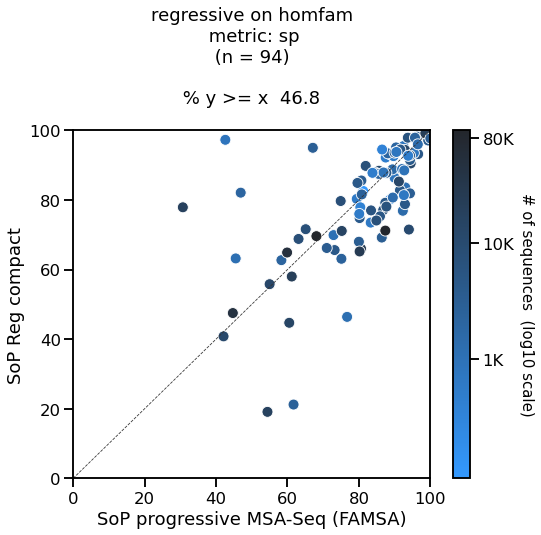

In [118]:
plot_scatter_perc(scores_sequence,score_compact,'SoP progressive MSA-Seq (FAMSA)', 'SoP Reg compact', metric = "sp")

In [75]:


def plot_scatter_perc(df1,df2,xlabel,ylabel,
                      palette = sns.dark_palette("#3399FF", reverse = True, as_cmap=True),
                      log = True, 
                      title = "regressive on homfam", hue_var = "sim", metric = "tc", size_fig = 1): 
    f, ax = plt.subplots(figsize=(8*size_fig,6.4*size_fig ))
    
    # Prep df 
    df = df1.merge(df2, on = ["family", hue_var])
    
    
    hue = df[hue_var]
    # colorbar 
    norm = mpl.colors.Normalize( vmin=0, vmax=100)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    
    # Color bar 
    cbar =ax.figure.colorbar(sm, ticks=[0,50,100], format=mpl.ticker.ScalarFormatter())
    cbar.ax.set_yticklabels(["0", "50", "100"]) 
    cbar.ax.set_ylabel('avg % similarity', rotation=270, labelpad = 20, fontsize = "small")
    
    metric_x = metric+"_x"
    metric_y = metric+"_y"
    # Plot 
    ax = sns.scatterplot(data = df, x = metric_x,
                    y = metric_y,
                    hue = hue_var,
                    s = 100,
                    palette = palette)

    # % above the line
    perc_y_better_than_x = (len(list(filter(lambda ele: ele == True, list(df[metric_x] <= df[metric_y])))) / len(list(df[metric_x]  >= df[metric_y] ))) * 100
    
    # Diagonal line
    ax.axline((1, 1), slope=1, ls="--", c=".2", lw = 0.8)
    
    ax.set(xlim = (0,100), ylim = (0,100))
    ax.get_legend().remove()
    
    # Axis labels
    ax.set(xlabel=xlabel,
           ylabel=ylabel,
           title = title + "\n metric: "+metric+"\n (n = "+str(len(df[metric_x] ))+") \n\n % y >= x  "+str(round(perc_y_better_than_x,1))+" \n")


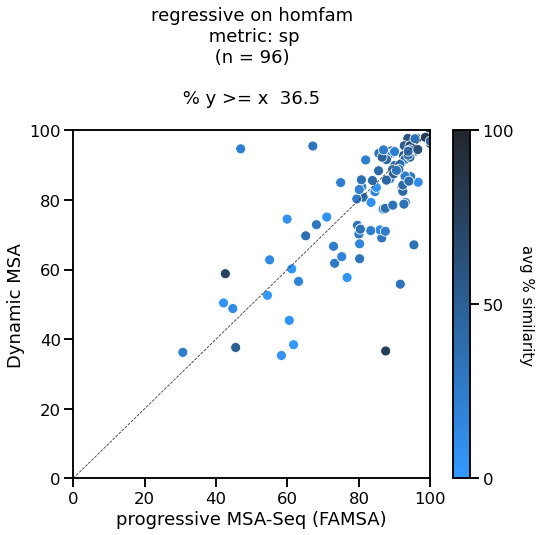

In [76]:
plot_scatter_perc(scores_sequence,scores_dynamic,'progressive MSA-Seq (FAMSA)', 'Dynamic MSA', metric = "sp")

In [77]:
scores_sequence_dissimilar = scores_sequence[scores_sequence.sim < 30]

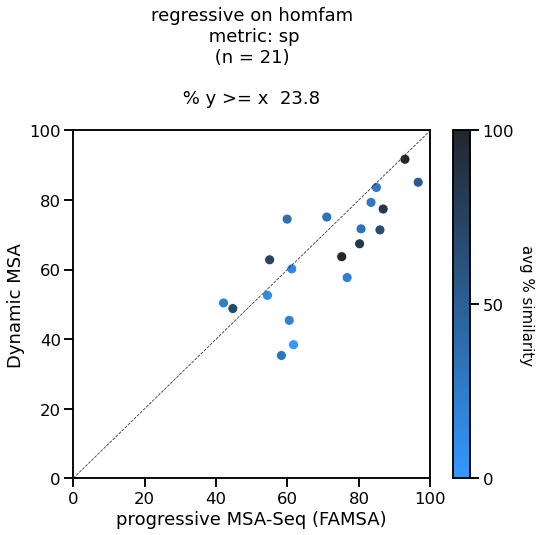

In [78]:
plot_scatter_perc(scores_sequence_dissimilar,scores_dynamic,'progressive MSA-Seq (FAMSA)', 'Dynamic MSA', metric = "sp")